# Explore Exercises
Do your work for this exercise in a file named ```explore```.

In [37]:
import re
import nltk
import unicodedata
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

# ------------- #
# Local Imports #
# ------------- #

# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# env containing sensitive access credentials
import env
from env import get_db_url
from env import user, password, host

<div class="alert alert-warning">

## 1. Spam Data

### a. Load the spam data set.

In [2]:
# acquire data from spam_db

url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


### 1. lowercase everything

In [4]:
df = df.apply(lambda x: x.astype(str).str.lower())
df

,label,text
id,,
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ì_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [6]:
# take a look at all spam entries
df[df.label == 'spam']['text']

id
2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling it's been 3 week's n...
8       winner!! as a valued network customer you have...
9       had your mobile 11 months or more? u r entitle...
11      six chances to win cash! from 100 to 20,000 po...
                              ...                        
5537    want explicit sex in 30 secs? ring 02073162414...
5540    asked 3mobile if 0870 chatlines inclu in free ...
5547    had your contract mobile 11 mnths? latest moto...
5566    reminder from o2: to get 2.50 pounds free call...
5567    this is the 2nd time we have tried 2 contact u...
Name: text, Length: 747, dtype: object

### Convert DataFrame to list and clean

In [7]:
# basic cleaning function:
# add_stopwords = ['r', 'u', '2', 'ltgt']

def clean(text, stem_or_lem=None, add_stopwords=[]):
    """
    Description:
    Simplified text cleaning function
    
    Required Imports:
    import re
    import nltk
    import unicodedata
    import pandas as pd
    from nltk.corpus import stopwords

    Arguments:
             text = The text you want to clean
      stem_or_lem = Default is None; stem will perform stemming on your text; lem will lemmatize it.
    add_stopwords = [] This is an empty list by default; just add words that you want to include as stopwords.
    
    Returns:
    returns list of cleaned words.
    """
    # 1. lowercase everything
    text = text.lower()
    # 2. Remove accented and ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # 3. Remove special characters
    words = re.sub(r"[^a-z0-9\s]", '', text).split()
    # 4. Tokenize
    tokenize = nltk.tokenize.ToktokTokenizer()
    tokenize.tokenize(text, return_str=False)
    # 5. Stemming or Lemmatizing
    if stem_or_lem == "stem":
        ps = nltk.porter.PorterStemmer()
        text = [ps.stem(word) for word in text.split()]
        ' '.join(text)
        print('Stemming Performed')
    elif stem_or_lem == "lem":
        wnl = nltk.stem.WordNetLemmatizer()
        text = [wnl.lemmatize(word) for word in text.split()]
        ' '.join(text)
        print('Lemmatizing Performed')
    else:
        print('No Stemming or Lemmatizing Performed')
    # 6. Remove StopWords
    stopwords = nltk.corpus.stopwords.words('english') + add_stopwords
    
    return [word for word in words if word not in stopwords]

In [8]:
# Assign all, ham, and spam lists by passing the clean function with a join
ham_words = clean(' '.join(df[df.label == 'ham']['text']),'stem')
spam_words = clean(' '.join(df[df.label == 'spam']['text']),'stem')
all_words = clean(' '.join(df['text']),'stem')

Stemming Performed
Stemming Performed
Stemming Performed


In [9]:
# show word count
len(all_words), len(spam_words), len(ham_words)

(52208, 12505, 39703)

In [10]:
# Assign word counts to Frequency Variables
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
# check our work
spam_words

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'weeks',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'a900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 '20000',
 'pounds',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 

In [12]:
spam_freq

call        347
free        216
2           173
txt         150
u           147
           ... 
26th          1
okmail        1
moan          1
69888nyt      1
now1          1
Length: 2925, dtype: int64

In [13]:
# Create Frequency DataFrame
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts

,ham,spam,all
u,986,147,1133
im,449,13,462
2,305,173,478
get,303,83,386
ltgt,276,0,276
...,...,...,...
expired,0,1,1
9153,0,1,1
okmail,0,1,1
69888nyt,0,1,1


In [14]:
# sort by 'spam'
word_counts.sort_values('spam', ascending=False)

,ham,spam,all
call,229,347,576
free,59,216,275
2,305,173,478
txt,13,150,163
u,986,147,1133
...,...,...,...
url,1,0,1
24th,1,0,1
lou,2,0,2
urgh,1,0,1


In [15]:
# Show spam and ham percentage of 'all'
word_counts.sort_values('spam', ascending=False)\
    .head(20)\
    .apply(lambda row: row/row['all'], axis = 1)

,ham,spam,all
call,0.397569,0.602431,1.0
free,0.214545,0.785455,1.0
2,0.638075,0.361925,1.0
txt,0.079755,0.920245,1.0
u,0.870256,0.129744,1.0
ur,0.625000,0.375000,1.0
mobile,0.108696,0.891304,1.0
text,0.361702,0.638298,1.0
4,0.585366,0.414634,1.0
stop,0.246667,0.753333,1.0


<AxesSubplot:>

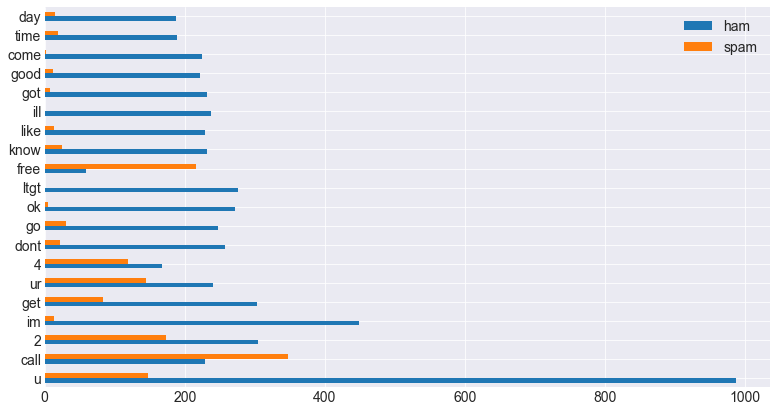

In [41]:
# Plot Top-20 Words and compare by spam/ham
plt.rc('font', size=14)
word_counts.sort_values('all', ascending=False)[['ham','spam']].head(20).plot.barh()

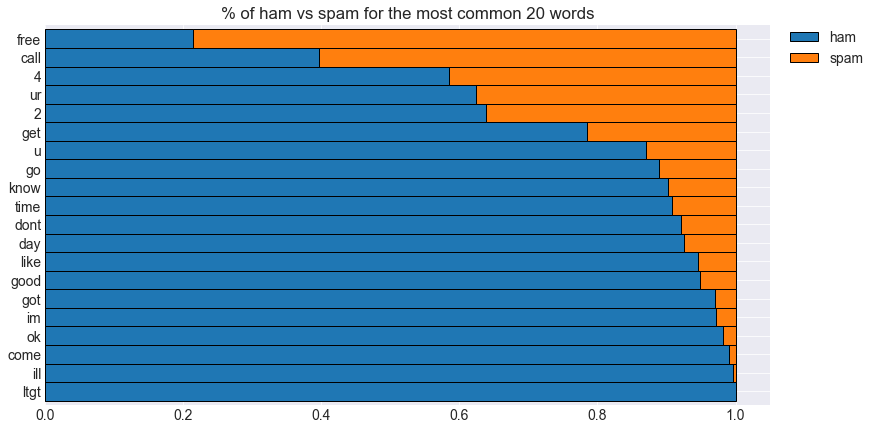

In [39]:
## visually compare ham and spam by the top 20 most frequent words
plt.rc('font', size=14)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of ham vs spam for the most common 20 words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [42]:
# Display Bi-Gram using ngram code
list(nltk.ngrams(spam_words, 2))

[('free', 'entry'),
 ('entry', '2'),
 ('2', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', '87121'),
 ('87121', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'darling'),
 ('darling', '3'),
 ('3', 'weeks'),
 ('weeks', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'fun'),
 ('fun', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 ('std', 'chgs'),
 ('chgs', 'send'),
 ('send', 'a150'),
 ('a150', 'rcv'),
 ('rcv', 'winner'),
 ('winner', 'valued'),
 ('valued', 'network'),
 ('network', 'customer'),
 ('customer', 'selected'),
 ('selected', 'receivea'),
 ('receivea', 'a900'),
 ('a900', 'prize'),


<AxesSubplot:>

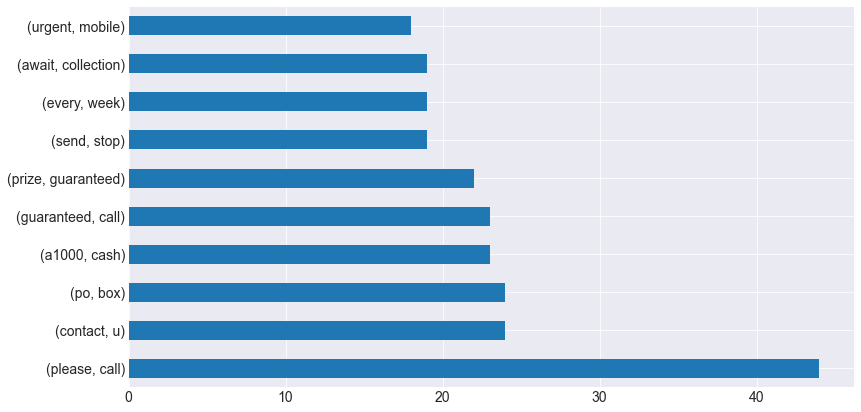

In [43]:
# Display top 10 bigram pairs for spam_words
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(10).plot.barh()

In [44]:
# Create Bi-Gram Variables
all_2_gram = list(nltk.ngrams(all_words, 2))
spam_2_gram = list(nltk.ngrams(spam_words, 2))
ham_2_gram = list(nltk.ngrams(ham_words, 2))

<function matplotlib.pyplot.show(close=None, block=None)>

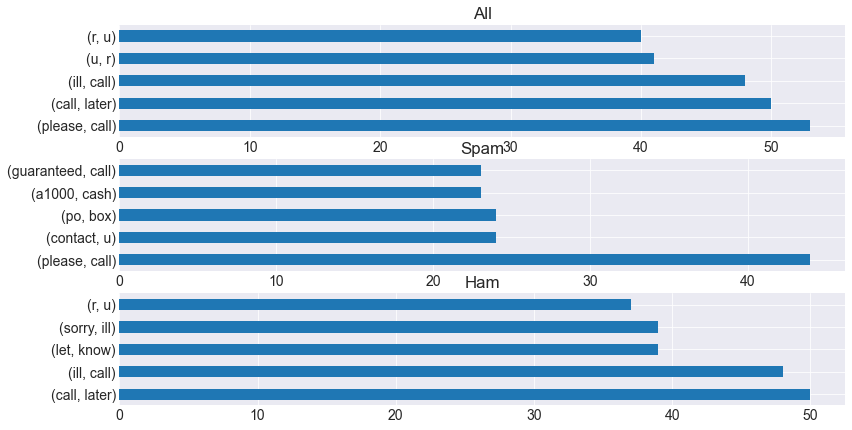

In [50]:
# Display top 5 bigram pairs for ham and spam

plt.subplot(3,1,1)
pd.Series(all_2_gram).value_counts().head(5).plot.barh()
plt.title('All')

plt.subplot(3,1,2)
pd.Series(spam_2_gram).value_counts().head(5).plot.barh()
plt.title('Spam')

plt.subplot(3,1,3)
pd.Series(ham_2_gram).value_counts().head(5).plot.barh()
plt.title('Ham')

plt.show

## Word Cloud

`python -m pip install --upgrade wordcloud`

documentation: https://amueller.github.io/word_cloud/

In [47]:
from wordcloud import WordCloud

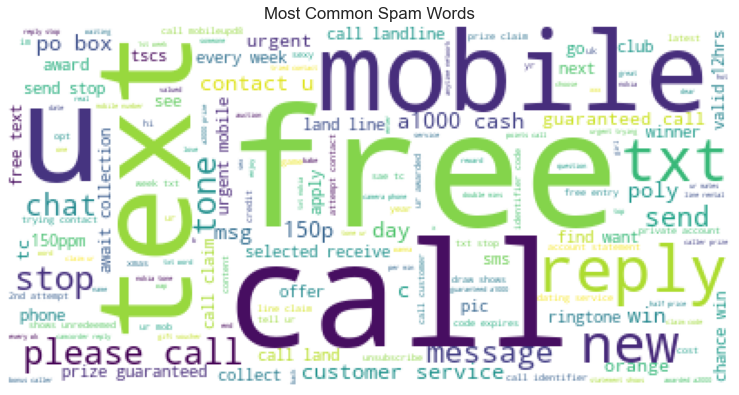

In [48]:
# making a word cloud:
# call WordCloud.generate 
# reference a string with all words, not a
# list or series
# call plt.imshow on the generation from wordcloud
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

### c. Is there any overlap in the bigrams for the spam data and the ham data?
* Not down to the top 10

### d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [51]:
# Create Bi-Gram Variables
all_3_gram = list(nltk.ngrams(all_words, 3))
spam_3_gram = list(nltk.ngrams(spam_words, 3))
ham_3_gram = list(nltk.ngrams(ham_words, 3))

<function matplotlib.pyplot.show(close=None, block=None)>

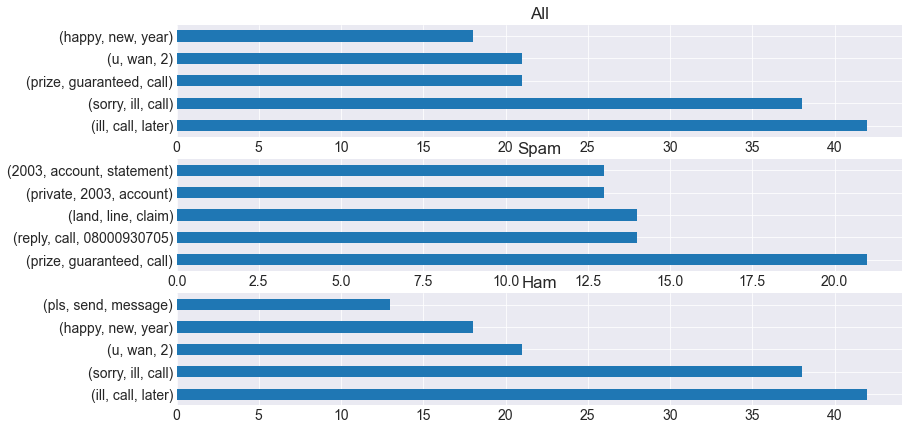

In [52]:
# Display top 5 bigram pairs for ham and spam

plt.subplot(3,1,1)
pd.Series(all_3_gram).value_counts().head(5).plot.barh()
plt.title('All')

plt.subplot(3,1,2)
pd.Series(spam_3_gram).value_counts().head(5).plot.barh()
plt.title('Spam')

plt.subplot(3,1,3)
pd.Series(ham_3_gram).value_counts().head(5).plot.barh()
plt.title('Ham')

plt.show

<div class="alert alert-warning">

## 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [53]:
# Acquire Blogs
import acquire as a
url = 'https://codeup.com/blog/'

articles = a.get_blog_articles(url)

/Users/qmcbt/codeup-data-science/01_classroom_exercises/natural-language-processing-exercises/acquire.py:43: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 43 of the file /Users/qmcbt/codeup-data-science/01_classroom_exercises/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(url_response.text)


In [54]:
# Create DataFrame
codeup_df = pd.DataFrame(articles)
codeup_df

,title,content
0,Codeup Among Top 58 Best Coding Bootcamps of 2023,Codeup is pleased to announce we have been ran...
1,Become a Data Scientist in 6 Months!,Are you feeling unfulfilled in your work but w...
2,Hiring Tech Talent Around the Holidays,Are you a hiring manager having trouble fillin...
3,Cloud Administration Program New Funding Options,Finding resources to fund your educational goa...
4,Why Dallas is a Great Location for IT Professi...,"When breaking into a new career, it is importa..."
5,Codeup is ranked #1 Best in DFW 2022,We are excited to announce that Codeup ranked ...


In [65]:
# Assign list by passing the clean function with a join
blog_words = clean(' '.join(codeup_df.content),'lem', add_stopwords=['codeup'])

Lemmatizing Performed


In [66]:
# check work
blog_words

['pleased',
 'announce',
 'ranked',
 'among',
 '58',
 'best',
 'coding',
 'bootcamps',
 '2023',
 'course',
 'report',
 'course',
 'report',
 'platform',
 'become',
 'essential',
 'researching',
 'coding',
 'bootcamps',
 'last',
 '10',
 'years',
 'every',
 'year',
 'course',
 'report',
 'shares',
 'list',
 'coding',
 'bootcamps',
 'worldwide',
 'meet',
 'high',
 'standard',
 'educational',
 'offerings',
 'following',
 'factors',
 'decisionmaking',
 'process',
 'alumni',
 'student',
 'reviews',
 'transparency',
 'around',
 'career',
 'outcomes',
 'salarybased',
 'financing',
 'options',
 'schools',
 'operation',
 'time',
 'number',
 'campuses',
 'selectivity',
 'application',
 'process',
 'vetted',
 'lending',
 'partnerships',
 'caliber',
 'career',
 'support',
 'commitment',
 'diversity',
 'highlighted',
 'established',
 'school',
 'transparent',
 'outcomes',
 'course',
 'report',
 'primarily',
 'utilized',
 'previous',
 'potential',
 'students',
 'seeking',
 'information',
 'coding',
 

In [67]:
# Assign word counts to Frequency Variables
blog_freq = pd.Series(blog_words).value_counts()
blog_freq

tech          23
career        21
program       17
job           13
give          13
              ..
vacations      1
activities     1
end            1
closures       1
75202          1
Length: 555, dtype: int64

In [79]:
# Create Frequency DataFrame
word_counts = pd.DataFrame(blog_freq)
word_counts.columns = ['count']
word_counts

,count
tech,23
career,21
program,17
job,13
give,13
...,...
vacations,1
activities,1
end,1
closures,1


In [82]:
# Create Bi-Gram using ngram code
blog_2_gram = list(nltk.ngrams(blog_words, 2))
blog_2_gram

[('pleased', 'announce'),
 ('announce', 'ranked'),
 ('ranked', 'among'),
 ('among', '58'),
 ('58', 'best'),
 ('best', 'coding'),
 ('coding', 'bootcamps'),
 ('bootcamps', '2023'),
 ('2023', 'course'),
 ('course', 'report'),
 ('report', 'course'),
 ('course', 'report'),
 ('report', 'platform'),
 ('platform', 'become'),
 ('become', 'essential'),
 ('essential', 'researching'),
 ('researching', 'coding'),
 ('coding', 'bootcamps'),
 ('bootcamps', 'last'),
 ('last', '10'),
 ('10', 'years'),
 ('years', 'every'),
 ('every', 'year'),
 ('year', 'course'),
 ('course', 'report'),
 ('report', 'shares'),
 ('shares', 'list'),
 ('list', 'coding'),
 ('coding', 'bootcamps'),
 ('bootcamps', 'worldwide'),
 ('worldwide', 'meet'),
 ('meet', 'high'),
 ('high', 'standard'),
 ('standard', 'educational'),
 ('educational', 'offerings'),
 ('offerings', 'following'),
 ('following', 'factors'),
 ('factors', 'decisionmaking'),
 ('decisionmaking', 'process'),
 ('process', 'alumni'),
 ('alumni', 'student'),
 ('student'

In [109]:
pd.Series(blog_2_gram).value_counts().head()

(middle, states)    8
(career, tech)      7
(financial, aid)    5
(course, report)    5
(youll, learn)      5
dtype: int64

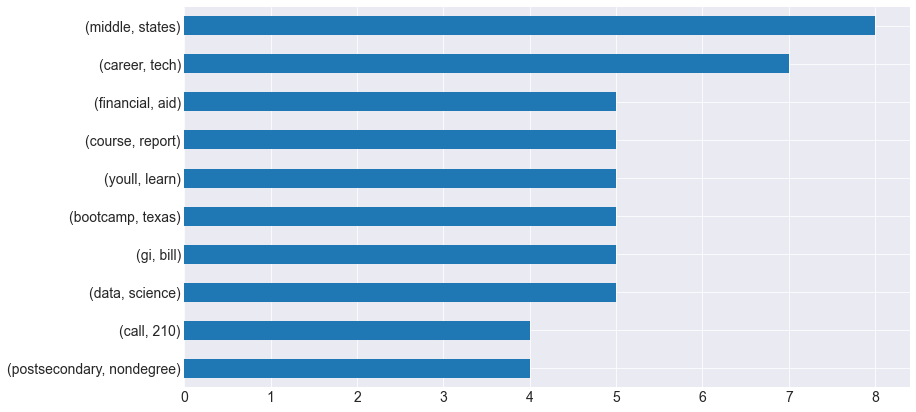

In [87]:
# Display top 10 bigram pairs for blog_words
pd.Series(blog_2_gram).value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()

In [89]:
# Display Bi-Gram using ngram code
blog_3_gram = list(nltk.ngrams(blog_words, 3))
blog_3_gram

[('pleased', 'announce', 'ranked'),
 ('announce', 'ranked', 'among'),
 ('ranked', 'among', '58'),
 ('among', '58', 'best'),
 ('58', 'best', 'coding'),
 ('best', 'coding', 'bootcamps'),
 ('coding', 'bootcamps', '2023'),
 ('bootcamps', '2023', 'course'),
 ('2023', 'course', 'report'),
 ('course', 'report', 'course'),
 ('report', 'course', 'report'),
 ('course', 'report', 'platform'),
 ('report', 'platform', 'become'),
 ('platform', 'become', 'essential'),
 ('become', 'essential', 'researching'),
 ('essential', 'researching', 'coding'),
 ('researching', 'coding', 'bootcamps'),
 ('coding', 'bootcamps', 'last'),
 ('bootcamps', 'last', '10'),
 ('last', '10', 'years'),
 ('10', 'years', 'every'),
 ('years', 'every', 'year'),
 ('every', 'year', 'course'),
 ('year', 'course', 'report'),
 ('course', 'report', 'shares'),
 ('report', 'shares', 'list'),
 ('shares', 'list', 'coding'),
 ('list', 'coding', 'bootcamps'),
 ('coding', 'bootcamps', 'worldwide'),
 ('bootcamps', 'worldwide', 'meet'),
 ('worl

In [107]:
pd.Series(blog_3_gram).value_counts().head(60)

(call, 210, 8027289)                       4
(well, walk, process)                      4
(learn, programs, well)                    4
(programs, well, give)                     4
(well, give, information)                  4
(give, information, financial)             4
(information, financial, aid)              4
(financial, aid, admissions)               4
(aid, admissions, also)                    4
(programs, middle, states)                 4
(technology, programs, middle)             4
(career, technology, programs)             4
(granting, career, technology)             4
(nondegree, granting, career)              4
(admissions, also, provide)                4
(also, provide, programspecific)           4
(provide, programspecific, information)    4
(programspecific, information, inbox)      4
(information, inbox, time)                 4
(inbox, time, get)                         4
(time, get, started)                       4
(get, started, give)                       4
(started, 

(0.0, 5.0)

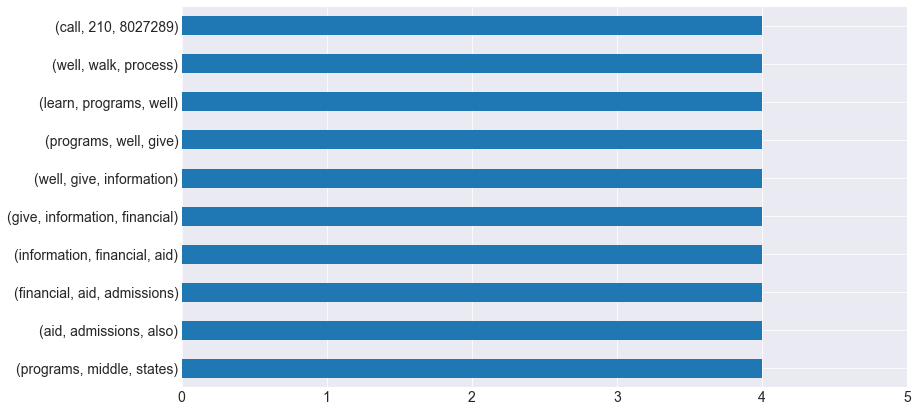

In [108]:
# Display top 10 bigram pairs for blog_words
pd.Series(blog_3_gram).value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()
plt.xlim(0, 5)

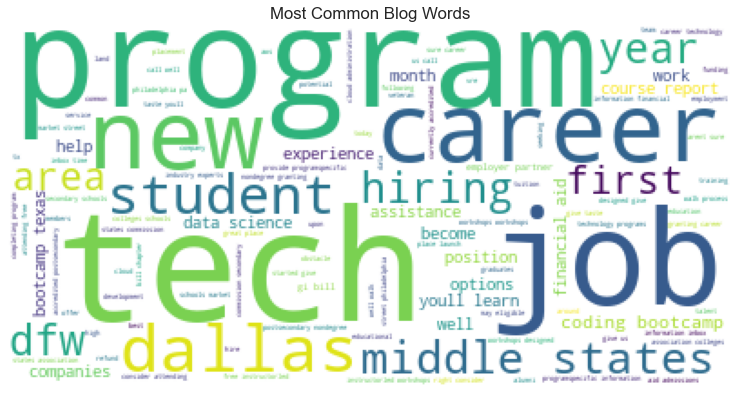

In [110]:
# Make a Word Cloud
img = WordCloud(background_color='white'
               ).generate(' '.join(blog_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Blog Words')
plt.show()

<div class="alert alert-info">


## Observations
* Top-3 Word Counts are:
    * tech          23
    * career        21
    * program       17
* Top-2 Bi-Grams are:
    * (middle, states)    8
    * (career, tech)      7
* Top Tri-Grams for Blog words have a value count of 4 for the first 58 sets.

<div class="alert alert-warning">

## 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the ```category``` variable when exploring.

In [111]:
import acquire as a
url = 'https://inshorts.com/en/read'
category_list = ['business', 'technology', 'automobile']

articles = a.get_news_articles(url, category_list)

In [112]:
news_df = pd.DataFrame(articles)
news_df

,title,content,category
0,Netflix co-CEO Reed Hastings steps down,Netflix Co-founder Reed Hastings has stepped d...,business
1,"HCLTech expects to hire 30,000 people in next ...",HCL Technologies (or HCLTech) is expected to h...,business
2,Amazon to shut down its charity donation progr...,Amazon has announced that it will shut down it...,business
3,Supreme Court rejects Google's plea against re...,The Supreme Court on Thursday refused to enter...,business
4,Videocon CEO Venugopal Dhoot granted interim b...,The Bombay High Court on Friday granted interi...,business
...,...,...,...
69,India can become exporter of green hydrogen wi...,The government's mission for clean energy will...,automobile
70,Volkswagen sales hit 11-year low in 2022 at 8....,Volkswagen sales fell 7% to 8.3 million vehicl...,automobile
71,Tesla cuts vehicle prices in US a week after p...,Tesla has reduced prices of its Model 3 and Mo...,automobile
72,Over 6 crore FASTags issued till October 31 la...,Over six crore FASTags have been issued as on ...,automobile


In [118]:
# Assign list by passing the clean function with a join
business_words = clean(' '.join(news_df[news_df.category == 'business']['content']),'lem')
tech_words = clean(' '.join(news_df[news_df.category == 'technology']['content']),'lem')
auto_words = clean(' '.join(news_df[news_df.category == 'automobile']['content']),'lem')
all_words = clean(' '.join(news_df['content']),'lem')

Lemmatizing Performed
Lemmatizing Performed
Lemmatizing Performed
Lemmatizing Performed


In [119]:
# check work
auto_words

['allnew',
 'mahindra',
 'xuv400',
 'available',
 'two',
 'variants',
 'xuv400',
 'ec',
 'xuv400',
 'el',
 '5',
 'colour',
 'options',
 'esuv',
 'boasts',
 'fastest',
 'acceleration',
 'segment',
 'going',
 '0100',
 '83',
 'seconds',
 'top',
 'speed',
 '150',
 'kmph',
 'maximum',
 'range',
 '456',
 'km',
 'mahindra',
 'revealed',
 'bookings',
 'commence',
 'january',
 '26',
 'vehicles',
 'owned',
 'central',
 'state',
 'governments',
 'older',
 '15',
 'years',
 'deregistered',
 'scrapped',
 'new',
 'rules',
 'applicable',
 'april',
 '1',
 '2023',
 'according',
 'notification',
 'transport',
 'ministry',
 'includes',
 'buses',
 'owned',
 'transport',
 'corporations',
 'public',
 'sector',
 'undertakings',
 'rules',
 'wont',
 'apply',
 'special',
 'purpose',
 'vehicles',
 'used',
 'countrys',
 'defence',
 'taliban',
 'unveiled',
 'first',
 'supercar',
 'mada',
 '9',
 'said',
 'designed',
 'made',
 'afghanistan',
 'taliban',
 'spokesman',
 'zabihullah',
 'mujahid',
 'posted',
 'images',
 

In [120]:
# Assign word counts to Frequency Variables
business_freq = pd.Series(business_words).value_counts()
tech_freq = pd.Series(tech_words).value_counts()
auto_freq = pd.Series(auto_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [122]:
# Create Frequency DataFrame
word_counts = pd.concat([business_freq, tech_freq, auto_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['business','tech','auto','all']
word_counts

,business,tech,auto,all
said,26,18,19,63
indias,7,2,3,12
india,7,4,9,20
company,7,6,6,19
added,6,4,4,14
...,...,...,...,...
allegedly,0,0,1,1
testimony,0,0,1,1
staged,0,0,1,1
technology,0,0,1,1


In [123]:
# sort by 'all'
word_counts.sort_values('all', ascending=False)

,business,tech,auto,all
said,26,18,19,63
india,7,4,9,20
company,7,6,6,19
added,6,4,4,14
ceo,5,3,5,13
...,...,...,...,...
accused,0,1,0,1
wherein,0,1,0,1
enforcement,0,1,0,1
notified,0,1,0,1


In [150]:
# Show percentage of whole
word_counts.sort_values('auto', ascending=False)\
 .head(20)\
 .apply(lambda row: row/row['all'], axis = 1)

,business,tech,auto,all
said,0.412698,0.285714,0.301587,1.0
vehicles,0.000000,0.000000,1.000000,1.0
tesla,0.000000,0.000000,1.000000,1.0
india,0.350000,0.200000,0.450000,1.0
2023,0.272727,0.000000,0.727273,1.0
ev,0.111111,0.111111,0.777778,1.0
electric,0.111111,0.111111,0.777778,1.0
car,0.000000,0.000000,1.000000,1.0
2022,0.200000,0.200000,0.600000,1.0
vehicle,0.125000,0.125000,0.750000,1.0


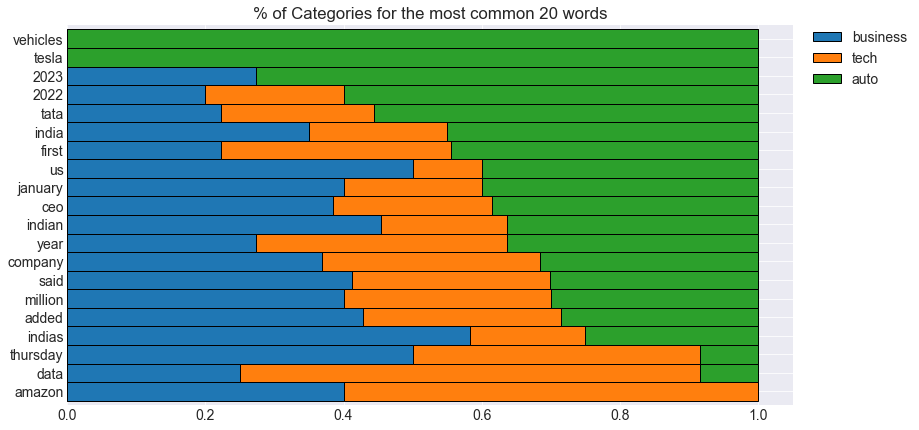

In [136]:
# visually compare the three categories by the top 20 most frequent words
#plt.figure(figsize=(9, 9))
plt.rc('font', size=14)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .sort_values(by = 'auto')
 .drop(columns = 'all')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of Categories for the most common 20 words')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [124]:
# Create Bi-Gram using ngram code
business_2_gram = list(nltk.ngrams(business_words, 2))
tech_2_gram = list(nltk.ngrams(tech_words, 2))
auto_2_gram = list(nltk.ngrams(auto_words, 2))
all_2_gram = list(nltk.ngrams(all_words, 2))

In [125]:
pd.Series(all_2_gram).value_counts().head()

(adani, enterprises)    5
(official, said)        4
(auto, expo)            4
(electric, vehicle)     4
(amazon, said)          4
dtype: int64

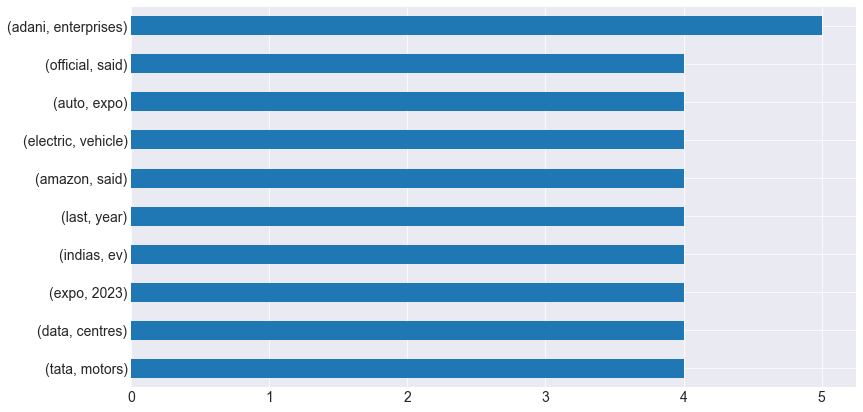

In [126]:
# Display top 10 bigram pairs for news words
pd.Series(all_2_gram).value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()

<function matplotlib.pyplot.show(close=None, block=None)>

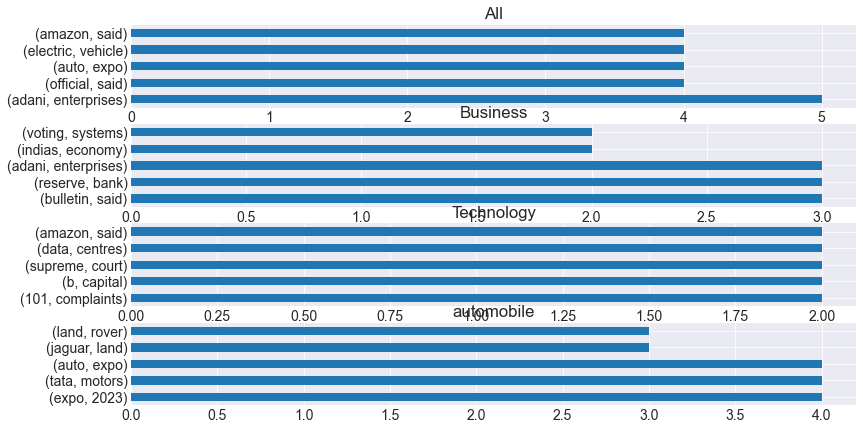

In [138]:
# Display top 5 bigram pairs for JavaScript lemmatized

plt.subplot(4,1,1)
pd.Series(all_2_gram).value_counts().head(5).plot.barh()
plt.title('All')

plt.subplot(4,1,2)
pd.Series(business_2_gram).value_counts().head(5).plot.barh()
plt.title('Business')

plt.subplot(4,1,3)
pd.Series(tech_2_gram).value_counts().head(5).plot.barh()
plt.title('Technology')

plt.subplot(4,1,4)
pd.Series(auto_2_gram).value_counts().head(5).plot.barh()
plt.title('automobile')

plt.show

In [139]:
# Create Bi-Gram using ngram code
business_3_gram = list(nltk.ngrams(business_words, 3))
tech_3_gram = list(nltk.ngrams(tech_words, 3))
auto_3_gram = list(nltk.ngrams(auto_words, 3))
all_3_gram = list(nltk.ngrams(all_words, 3))

In [140]:
pd.Series(all_3_gram).value_counts().head()

(auto, expo, 2023)                                      4
(mahindra, said, maharashtra)                           3
(plant, pune, companys)                                 3
(easeofdoingbusinesstogether, mahindras, investment)    3
(focus, easeofdoingbusinesstogether, mahindras)         3
dtype: int64

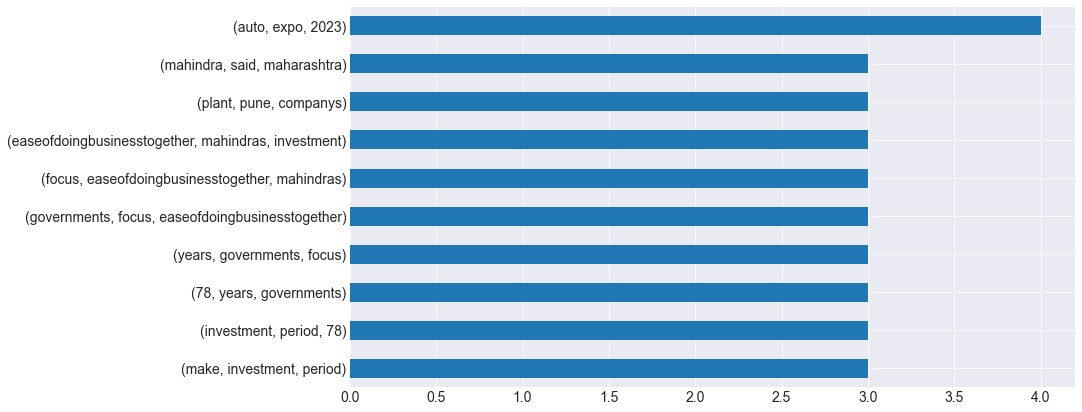

In [141]:
# Display top 10 bigram pairs for news words
pd.Series(all_3_gram).value_counts().head(10).plot.barh()
plt.gca().invert_yaxis()

<function matplotlib.pyplot.show(close=None, block=None)>

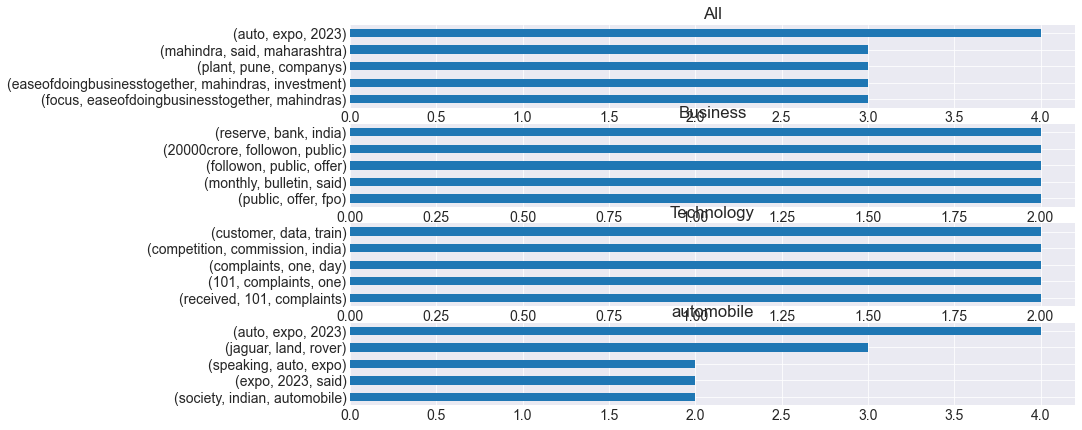

In [148]:
# Display top 5 bigram pairs for JavaScript lemmatized

plt.subplot(4,1,1)
pd.Series(all_3_gram).value_counts().head(5).plot.barh()
plt.title('All')
plt.gca().invert_yaxis()

plt.subplot(4,1,2)
pd.Series(business_3_gram).value_counts().head(5).plot.barh()
plt.title('Business')
plt.gca().invert_yaxis()

plt.subplot(4,1,3)
pd.Series(tech_3_gram).value_counts().head(5).plot.barh()
plt.title('Technology')
plt.gca().invert_yaxis()

plt.subplot(4,1,4)
pd.Series(auto_3_gram).value_counts().head(5).plot.barh()
plt.title('automobile')
plt.gca().invert_yaxis()

plt.show

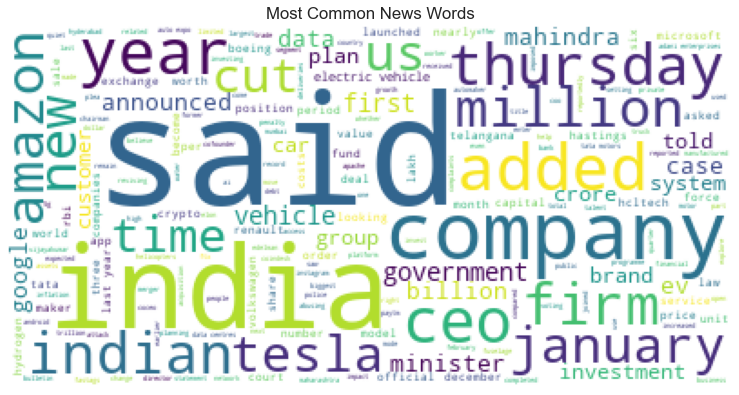

In [143]:
# Make a Word Cloud
img = WordCloud(background_color='white'
               ).generate(' '.join(all_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common News Words')
plt.show()

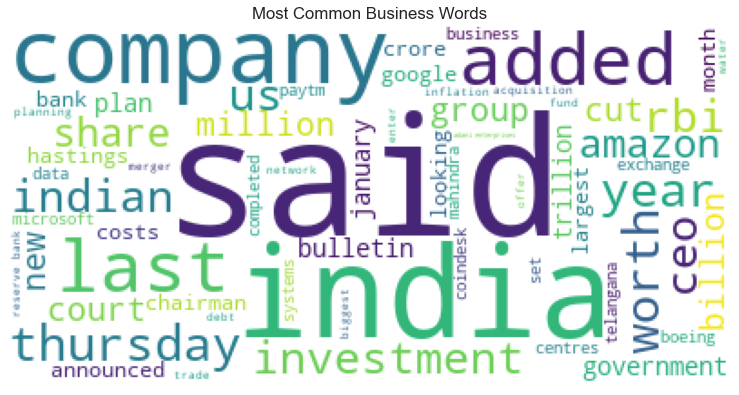

In [144]:
# Make a Word Cloud
img = WordCloud(background_color='white'
               ).generate(' '.join(business_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Business Words')
plt.show()

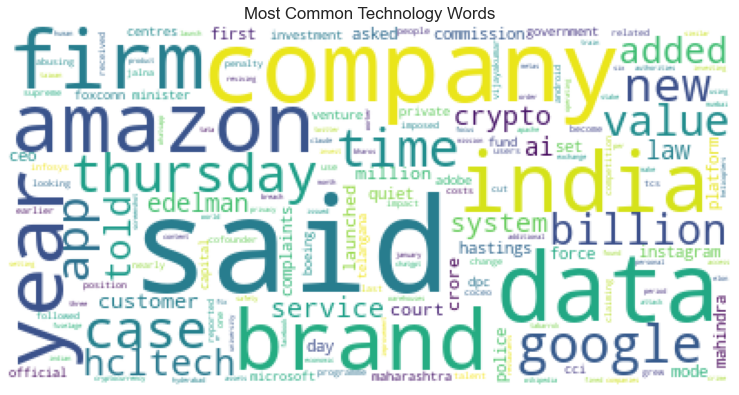

In [145]:
# Make a Word Cloud
img = WordCloud(background_color='white'
               ).generate(' '.join(tech_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Technology Words')
plt.show()

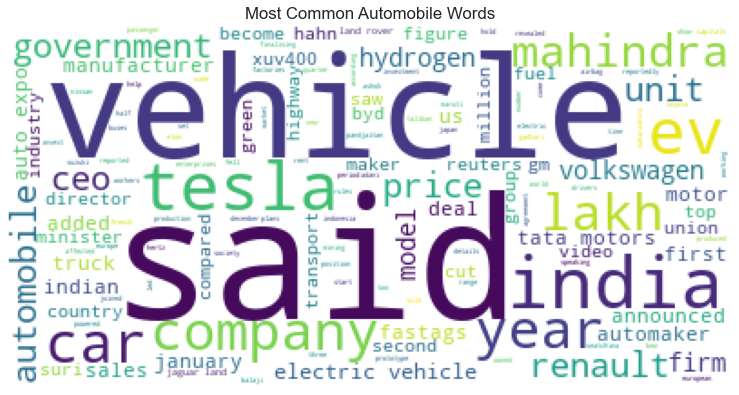

In [146]:
# Make a Word Cloud
img = WordCloud(background_color='white'
               ).generate(' '.join(auto_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Automobile Words')
plt.show()

<div class="alert alert-info">


## Observations
* Top-3 Word Counts are:
|       |business|tech|auto|all|
|:------|:------:|:--:|:--:|:-:|
|said   |	   26|	18|	 19| 63|
|india  |   	7|	 4|	  9| 20|
|company|   	7|   6|	  6| 19|
    
* Top Bi-Gram is:
    * (adani, enterprises)  5

* Top Tri-Grams is:
    * (auto, expo, 2023)    4
    
### Top 20 words that also have determinate weight on category:
* Business
    * 60% Indias
* Technology
    * 65% Data
    * 60% Amazon
* Automobiles
    * 100% Vehicles
    * 100% Tesla